Background

As a social media company, Social Buzz need to adapt to it’s global scale. Accenture has begun a 3 month POC focusing on these tasks:
1. An audit of Social Buzz’s big data practice
2. Recommendation for a successful IPO
3. Analysis to find Social Buzz’s top 5 most popular categories of content

The analystical tasks include:
1. understand the client and business problem at hand
2. prepare clean data needed to use
3. calculate and visualize the top 5 most popular categories of content and other valuable points of the data. 

Task 2: Data Cleaning

The task is to clean three related csv files provided before analying which includes:
ReactionTypes.csv
Reactions.csv
Content.csv


1. removing rows that have values which are missing
2. changing the data type of some values within a column
3. removing columns which are not relevant to this task

In [172]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [123]:
# import the files
read_con = pd.read_csv('Content.csv')
read_reaction = pd.read_csv('Reactions.csv')
read_reatype = pd.read_csv('ReactionTypes.csv')

In [124]:
# check the missing values and data type
read_con.info()
# read_con[read_con.URL.isnull()].shape
# read_con.isna().sum()
# read_con_clean = read_con.dropna()
# remove unrelated column and URL column which is not good quality
read_con.drop(['Unnamed: 0','URL','User ID'], axis=1,inplace = True)
# check the categroy quality, found some cells have quotation marks "" and cap/lower letter which need to be uniformed
print(read_con.Category.unique)
# reomve quotation marks
read_con.Category = read_con.Category.str.replace('"','')
# all category string be confirmed to lower letter
read_con.Category = read_con.Category.str.lower()
# count unique categries
read_con.Category.nunique()
# rename column name 'Type' to 'Content Type'
read_con.rename(columns = {'Type':'Content Type'}, inplace = True)
# export
read_con.to_csv('Content_updated.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
<bound method Series.unique of 0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object>


Column URL has missing values, but doesnt it affect to analysing if we dont have URL.

In [125]:
# check datatype and missing values
read_reaction.info()
# change datetime type from string to datetime
read_reaction['Datetime'] = pd.to_datetime(read_reaction.Datetime)
# remove unrelated column
read_reaction.drop(['Unnamed: 0','User ID'], axis=1,inplace = True)
# print(type(read_reaction.Datetime))
# remove missing values
read_reaction_clean = read_reaction.dropna()
# rename column name 'Type' to 'Reaction Type'
read_reaction_clean.rename(columns = {'Type':'Reaction Type'}, inplace = True)

read_reaction_clean.to_csv('Reaction_updated.csv',index = False)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


/Users/xiaokangdong/python-virtual-environments/env/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


User ID and Type have missing values. try to mapping the missing value from Contents table instead of simply drop them.

In [126]:
read_reatype.info()
# rename column name 'Type' to 'Reaction Type'
read_reatype.rename(columns = {'Type':'Reaction Type'}, inplace = True)
# remove unrelated column
read_reatype.drop(['Unnamed: 0'], axis=1,inplace = True)
# export
read_reatype.to_csv('Reactiontype_updated.csv',index= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


As shown above, no missing values in this table.

Task 3: Data analyst

1. Create a final data set by merging three tables together

 Using the Reaction table as base table, then first join the relevant columns from Content data set, and then the Reaction Types data set.
 
2. Figure out the Top 5 performing categories

Add up the total scores for each category.
3. Further exploring points

such as month with most traffic, to compare the top 5 with tail 5 etc.

In [132]:
# merge read_reaction_clean with read_con and then with read_reatype
merge = pd.merge(read_reaction_clean, read_con, on=['Content ID']).merge(read_reatype, on = ['Reaction Type'])

In [131]:
# Add up the scores group by each category and sort the value descendly
mg = merge.groupby(['Category']).Score.sum().sort_values(ascending = False)
mg

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64

In [163]:
# count reactions for each categories
merge.groupby(['Category'])['Reaction Type'].count()

Category
animals            1897
cooking            1664
culture            1676
dogs               1338
education          1433
fitness            1395
food               1699
healthy eating     1717
public speaking    1217
science            1796
soccer             1457
studying           1363
technology         1698
tennis             1328
travel             1647
veganism           1248
Name: Reaction Type, dtype: int64

In [185]:
# count # of content ID for each month
merge['month'] = merge['Datetime'].dt.month
merge.groupby(['month'])['Content ID'].nunique()


month
1     781
2     755
3     753
4     736
5     759
6     762
7     778
8     773
9     754
10    771
11    768
12    756
Name: Content ID, dtype: int64

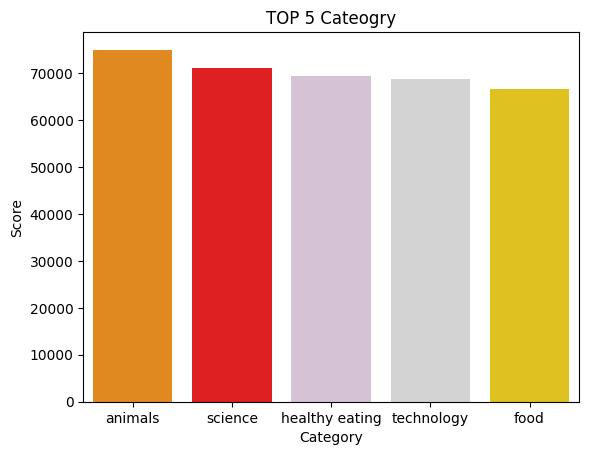

In [153]:
# visualized top 5 category
head = mg.head(5)
top = pd.DataFrame({'Category': head.index, 'Score':head.values})
sns.barplot(data = top, x = head.index, y = head.values,palette=["#FF8C00","#FF0000","#D8BFD8","#D3D3D3","#FFD700","#432371"])
plt.title("TOP 5 Cateogry")
plt.ylabel("Score")
plt.xlabel('Category')
plt.show()

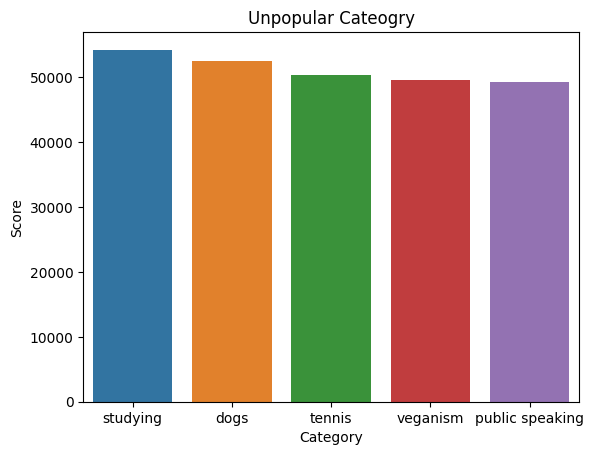

In [155]:
# visualized least popular 5 categories
tail = mg.tail(5)
last = pd.DataFrame({'Category': tail.index, 'Score':tail.values})
sns.barplot(data = last, x = tail.index, y = tail.values)
plt.title("Unpopular Cateogry")
plt.ylabel("Score")
plt.xlabel('Category')
plt.show()

In [133]:
# export final and clean dataset
c = pd.merge(merge, mg, on = ['Category'],suffixes=('', '_sum')).sort_values('Score_sum', ascending = False)
c.to_csv('merged dataset with top 5 categories.csv',index = False)


Next step is to present findings with following structure:

Agenda - What will your presentation cover?
Project Recap - What are the key points from the brief?
Problem - What is the problem that you answer in this presentation?
The Analytics team - Who is on your team?
As a reminder from the earlier task - this includes: Andrew Fleming (Chief Technical Architect), Marcus Rompton (Senior Principle), and you
Process - How did you complete your analysis?